### Sriram Sunderrajan
### 220962444
### DL Lab - 5
### AIML - A2 (77)
### 4th Februrary 2025
<br>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Question - 1

In [8]:
image = torch.rand(6,6)
print("image=", image)

image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)

image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)

print("image=", image)

kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)

print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

#Perform the convolution
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("Outimage=", outimage)

print("Shape of result = ", outimage.shape)

image= tensor([[0.9643, 0.9003, 0.0566, 0.6294, 0.1797, 0.3652],
        [0.3665, 0.0646, 0.1473, 0.7967, 0.0157, 0.1027],
        [0.1358, 0.5260, 0.4335, 0.9759, 0.5358, 0.6077],
        [0.8314, 0.7090, 0.2469, 0.5171, 0.5759, 0.3229],
        [0.3388, 0.1404, 0.8422, 0.5032, 0.6324, 0.1072],
        [0.2253, 0.2157, 0.0127, 0.2273, 0.7934, 0.1411]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.9643, 0.9003, 0.0566, 0.6294, 0.1797, 0.3652],
          [0.3665, 0.0646, 0.1473, 0.7967, 0.0157, 0.1027],
          [0.1358, 0.5260, 0.4335, 0.9759, 0.5358, 0.6077],
          [0.8314, 0.7090, 0.2469, 0.5171, 0.5759, 0.3229],
          [0.3388, 0.1404, 0.8422, 0.5032, 0.6324, 0.1072],
          [0.2253, 0.2157, 0.0127, 0.2273, 0.7934, 0.1411]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Outimage= tensor([[[[3.5950, 4.5304, 3.7706, 4.2088],
          [3.4610, 4.4170, 4.2448, 4.4505],
          [4.2040, 4.8941, 5

In [18]:
in_dim = 6
kernel_dim = 3
stride = 1
padding = 0

out_dim = (in_dim + 1 - kernel_dim + 2 * padding) // (stride)

print(f"Size of output image, by formula = {out_dim}")

Size of output image, by formula = 4


## Formula:

### out_size = (in_size + 1 - kernel_size + 2 * padding) / (stride)

## Question - 2

In [32]:
in_channels = 1
out_channels = 3

conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=0)
outimage = conv(image)

outimage, outimage.shape

(tensor([[[[ 4.5337e-01,  3.6067e-01,  3.8166e-01,  2.5664e-01],
           [ 3.5449e-01,  1.3805e-01,  1.9385e-01,  9.7134e-02],
           [-7.2044e-02,  3.1769e-01,  4.8374e-01,  3.4842e-01],
           [ 3.8728e-01,  5.8677e-02, -4.4321e-04,  2.9821e-01]],
 
          [[-4.2971e-01, -7.7806e-01, -3.6865e-01, -6.6879e-01],
           [-4.1924e-01, -3.3987e-01, -1.0239e-02, -1.9297e-01],
           [-1.1538e-01, -5.4354e-01, -5.5700e-01, -3.9710e-01],
           [-1.9258e-01, -5.1151e-02, -1.3095e-01, -2.2867e-01]],
 
          [[ 1.1843e-01, -2.0755e-02, -3.4626e-01, -3.0844e-01],
           [-3.0837e-01, -3.7011e-01, -3.4171e-01, -4.5708e-01],
           [-4.0023e-01, -2.7239e-01, -1.1359e-01, -1.5388e-01],
           [ 1.0038e-01, -7.8015e-02, -3.1907e-01, -2.6482e-01]]]],
        grad_fn=<ConvolutionBackward0>),
 torch.Size([1, 3, 4, 4]))

In [44]:
in_channels = 1
out_channels = 3

def conv2D(input, kernel, out_channels, stride=1, padding=0):
    outimage = None
    for i in range(out_channels):
        kernel_slice = kernel[:, i:i+1, :, :]
        channel = F.conv2d(input, kernel_slice, stride=stride, padding=padding)
        if outimage is None:
            outimage = channel
        else:
            outimage = torch.cat((outimage, channel), dim=1)
    return outimage

print(image.shape, kernel.shape)

kernel = torch.rand(1, out_channels, 3, 3)

outimage = conv2D(image, kernel, out_channels=out_channels)
outimage.shape

torch.Size([1, 1, 6, 6]) torch.Size([1, 3, 3, 3])


torch.Size([1, 3, 4, 4])

## Question - 3

In [2]:
import torchvision
from torchvision import transforms
import torch.nn.functional as F

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

batch_size = 4
train_set = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

test_set = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

example_data.size()

torch.Size([4, 1, 28, 28])

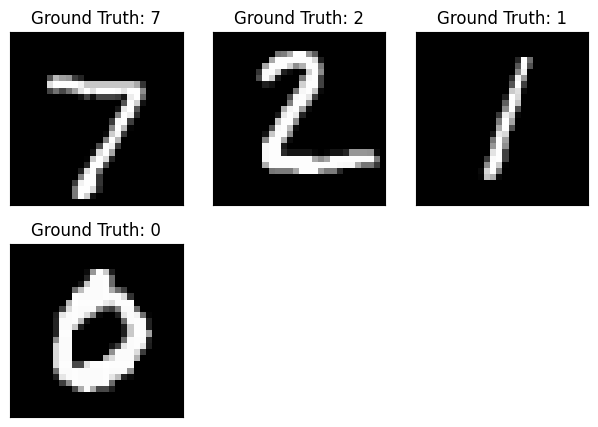

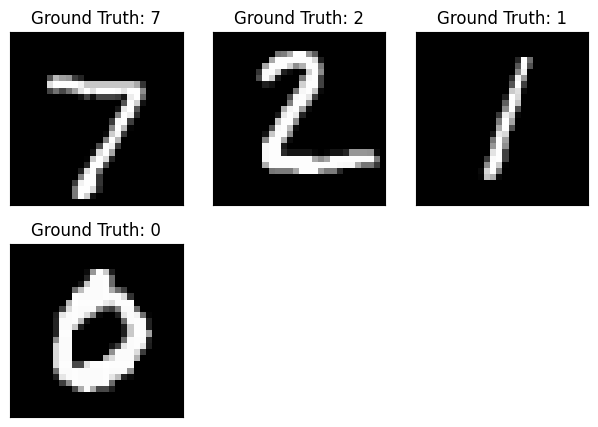

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [130]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(nn.Conv2d(1, 64, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(64, 128, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(128, 64, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2)
                                              )
        self.classification_head = nn.Sequential(nn.Flatten(),
                                                nn.Linear(64, 20, bias=True),
                                                nn.ReLU(),
                                                nn.Linear(20, 10, bias=True))
        
        
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classification_head(x)
        x = F.log_softmax(x, dim=1)
        return x
    


model = CNNNetwork().to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

In [133]:
losses = []
num_epochs = 9
model.train()

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for idx, (x_batch, y_batch) in enumerate(train_loader):
        batch_size = len(x_batch)
        loader_size = len(train_loader)
        
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        #print(x_batch.shape, y_batch.shape)
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(batch_size,-1)
        #y_pred = y_pred.argmax(dim=1)
        #y_batch, y_pred = y_batch.type(torch.float), y_pred.type(torch.float)
        #print(y_pred.shape, y_pred.dtype, y_batch.dtype)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
        
        if (idx % 1000 == 0):
            progress = (idx / loader_size)
            print(f"{idx * batch_size} / {loader_size * batch_size} : Progress = {progress:.2%}")
                
    if epoch%1 == 0:
        losses.append(epoch_loss.detach().cpu())
        print(f"Epoch {epoch}: Loss = {epoch_loss}")

0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%
56000 / 60000 : Progress = 93.33%
Epoch 1: Loss = 6759.09375
0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%
560

Number of parameters: 149798


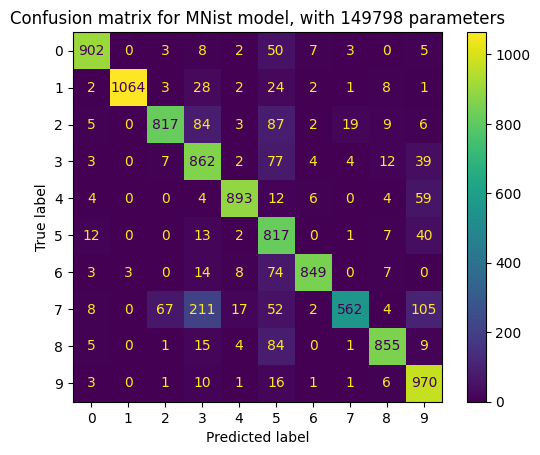

'85.91%'

In [134]:
model.eval()

losses = []
y_eval, y_preds = [], []


for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_pred = model(x_batch)
    y_pred = y_pred.argmax(dim=1)
    
    y_eval += y_batch.detach().cpu().numpy().tolist()
    y_preds += y_pred.detach().cpu().numpy().tolist()


total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

confusion_matrix = metrics.confusion_matrix(y_eval, y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()

plt.title(f"Confusion matrix for MNist model, with {total_params} parameters")
plt.show() 
   
acc1 = accuracy_score(y_preds, y_eval)    

f"{accuracy_score(y_preds, y_eval):.2%}"

### Question - 4

In [6]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(32, 64, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(64, 32, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2)
                                              )
        self.classification_head = nn.Sequential(nn.Flatten(),
                                                nn.Linear(32, 20, bias=True),
                                                nn.ReLU(),
                                                nn.Linear(20, 10, bias=True))
        
        
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classification_head(x)
        #x = F.log_softmax(x, dim=1)
        return x
    


model = CNNNetwork().to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-1)

total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 38150


In [15]:
losses = []
num_epochs = 5
model.train()

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for idx, (x_batch, y_batch) in enumerate(train_loader):
        batch_size = len(x_batch)
        loader_size = len(train_loader)
        
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(batch_size,-1)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
        
        if (idx % 1000 == 0):
            progress = (idx / loader_size)
            print(f"{idx * batch_size} / {loader_size * batch_size} : Progress = {progress:.2%}")
                
    if epoch%1 == 0:
        losses.append(epoch_loss.detach().cpu())
        print(f"Epoch {epoch}: Loss = {epoch_loss}")

0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%
56000 / 60000 : Progress = 93.33%
Epoch 1: Loss = 35067.4921875
0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%


Number of parameters: 38150


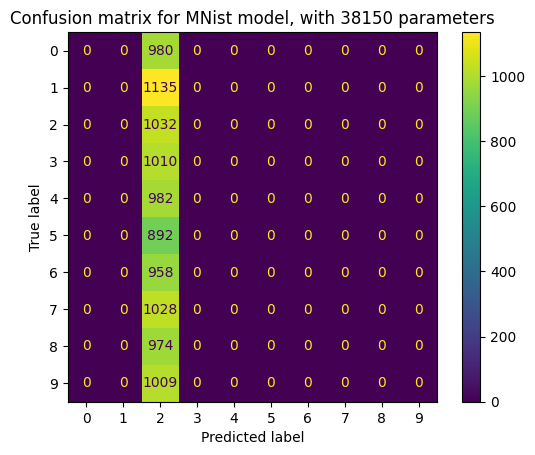

'10.32%'

In [12]:
model.eval()

losses = []
y_eval, y_preds = [], []


for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_pred = model(x_batch)
    y_pred = y_pred.argmax(dim=1)
    
    y_eval += y_batch.detach().cpu().numpy().tolist()
    y_preds += y_pred.detach().cpu().numpy().tolist()


total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

confusion_matrix = metrics.confusion_matrix(y_eval, y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()

plt.title(f"Confusion matrix for MNist model, with {total_params} parameters")
plt.show() 

acc2 = accuracy_score(y_preds, y_eval)  
    
f"{accuracy_score(y_preds, y_eval):.2%}"

In [123]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(nn.Conv2d(1, 16, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(16, 32, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2),
                                              nn.Conv2d(32, 16, kernel_size=3),
                                              nn.ReLU(),
                                              nn.MaxPool2d((2, 2), stride=2)
                                              )
        self.classification_head = nn.Sequential(nn.Flatten(),
                                                nn.Linear(16, 10, bias=True),
                                                nn.ReLU(),
                                                nn.Linear(10, 10, bias=True))
        
        
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classification_head(x)
        x = F.log_softmax(x, dim=1)
        return x
    


model = CNNNetwork().to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

losses = []
num_epochs = 15
model.train()

for epoch in range(1, num_epochs+1):
    epoch_loss = 0
    for idx, (x_batch, y_batch) in enumerate(train_loader):
        batch_size = len(x_batch)
        loader_size = len(train_loader)
        
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        #print(x_batch.shape, y_batch.shape)
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(batch_size,-1)
        #y_pred = y_pred.argmax(dim=1)
        #y_batch, y_pred = y_batch.type(torch.float), y_pred.type(torch.float)
        #print(y_pred.shape, y_pred.dtype, y_batch.dtype)

        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        epoch_loss += loss
        
        if (idx % 1000 == 0):
            progress = (idx / loader_size)
            print(f"{idx * batch_size} / {loader_size * batch_size} : Progress = {progress:.2%}")
                
    if epoch%1 == 0:
        losses.append(epoch_loss.detach().cpu())
        print(f"Epoch {epoch}: Loss = {epoch_loss}")
        
model.eval()

losses = []
y_eval, y_preds = [], []


for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_pred = model(x_batch)
    y_pred = y_pred.argmax(dim=1)
    
    y_eval += y_batch.detach().cpu().numpy().tolist()
    y_preds += y_pred.detach().cpu().numpy().tolist()


total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

confusion_matrix = metrics.confusion_matrix(y_eval, y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()

plt.title(f"Confusion matrix for MNist model, with {total_params} parameters")
plt.show() 

acc3 = accuracy_score(y_preds, y_eval)  
    
f"{accuracy_score(y_preds, y_eval):.2%}"

0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%
56000 / 60000 : Progress = 93.33%
Epoch 1: Loss = 34572.64453125
0 / 60000 : Progress = 0.00%
4000 / 60000 : Progress = 6.67%
8000 / 60000 : Progress = 13.33%
12000 / 60000 : Progress = 20.00%
16000 / 60000 : Progress = 26.67%
20000 / 60000 : Progress = 33.33%
24000 / 60000 : Progress = 40.00%
28000 / 60000 : Progress = 46.67%
32000 / 60000 : Progress = 53.33%
36000 / 60000 : Progress = 60.00%
40000 / 60000 : Progress = 66.67%
44000 / 60000 : Progress = 73.33%
48000 / 60000 : Progress = 80.00%
52000 / 60000 : Progress = 86.67%

'10.28%'

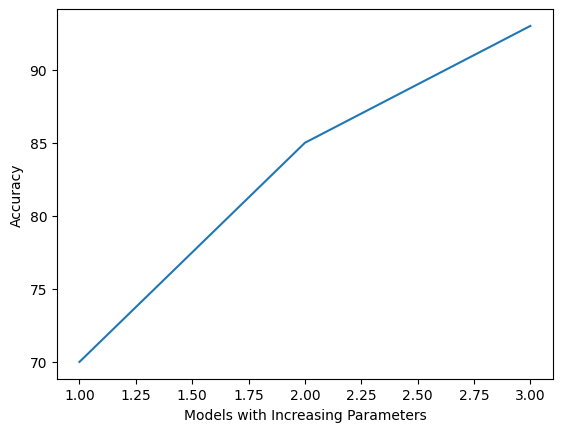

In [21]:
plt.plot([1, 2, 3], [acc3, acc2, acc1])
plt.xlabel("Models with Increasing Parameters")
plt.ylabel("Accuracy")
plt.show()